In [1]:
import pickle
import time
import os
from sys import platform

import numpy as np
import matplotlib.pyplot as plt
from geant3_parser import Geant3DataFile
from geant3_parser import build_train_set


In [2]:
file_name = os.path.join('data', 'shower_geant3_new.dat')


# file_name = 'sample_data.txt'
data_file = Geant3DataFile(file_name, skip_lines=3)

# split into input (X) and output (y) variables
parse_start = time.time()
print(f"Start preparing events...")

add_real_xy = False
inputs, true_e, sum_e = build_train_set(data_file, 50000, add_real_xy=add_real_xy, normalize=True)
parse_end = time.time()

print(f"Total events prepare time = {parse_end - parse_start}")
print(f"max hit value = {np.max(inputs)}")
print(f"max e = {np.max(true_e)}")

Time open 2.240962266921997
Time split 0.48989272117614746
Start preparing events...
Total events prepare time = 2.125920057296753
max hit value = 0.7597081518112012
max e = 5.5


In [3]:
from keras.models import Sequential
from keras.layers import Dense

2022-06-18 15:57:34.464357: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [4]:
model = Sequential()

input_dims = 123
middle_layer_size = 40
hidden_layers_num = 3
neuron_type = 'LeakyReLU'

# go from 20 to 123 in 5 steps (or from 123 to 20)

delta_dim = int((input_dims - middle_layer_size) / hidden_layers_num)

model.add(Dense(input_dims, input_dim=123, activation=neuron_type))

for i in range(1, hidden_layers_num):
    neurons_num =  input_dims - i*delta_dim
    model.add(Dense(neurons_num, activation=neuron_type))

for i in range(hidden_layers_num):
    neurons_num =  middle_layer_size + i*delta_dim
    model.add(Dense(neurons_num, activation=neuron_type))

model.add(Dense(input_dims, activation='tanh'))

2022-06-18 15:59:31.393374: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-06-18 15:59:32.494773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-18 15:59:32.494879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P1000 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 4 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 89.53GiB/s
2022-06-18 15:59:32.495004: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-06-18 15:59:32.534876: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-06-18 15:59:32.535085: I tensorflow/stream_executor/platform/d

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse', 'mae'])
# model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc', 'mse', 'mae'])

# fit the keras model on the dataset
history = model.fit(inputs, inputs, validation_split=0.05, epochs=10, batch_size=32, verbose=1)

# Save everything
name = "g3_autoencoder_with_xy" if add_real_xy else "g3_autoencoder_no_xy"

# Saving history
with open(name + "-history.pickle", 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# Saving the model
model.save(name + ".hd5")

2022-06-18 15:59:55.913153: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-18 15:59:55.920344: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2904005000 Hz


Epoch 1/10


2022-06-18 16:00:11.638503: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


   4/1485 [..............................] - ETA: 29s - loss: 0.4250 - acc: 0.1211 - mse: 0.0154 - mae: 0.0662    

2022-06-18 16:00:13.399001: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1485/1485 [==============================] - 39s 15ms/step - loss: 0.2028 - acc: 0.9356 - mse: 0.0211 - mae: 0.1155 - val_loss: 0.1556 - val_acc: 0.9792 - val_mse: 0.0111 - val_mae: 0.0896
Epoch 2/10
1485/1485 [==============================] - 23s 15ms/step - loss: 0.1544 - acc: 0.9776 - mse: 0.0135 - mae: 0.0969 - val_loss: 0.1512 - val_acc: 0.9792 - val_mse: 0.0189 - val_mae: 0.1171
Epoch 3/10
1485/1485 [==============================] - 24s 16ms/step - loss: 0.1509 - acc: 0.9770 - mse: 0.0158 - mae: 0.1065 - val_loss: 0.1423 - val_acc: 0.9792 - val_mse: 0.0104 - val_mae: 0.0864
Epoch 4/10
1485/1485 [==============================] - 24s 16ms/step - loss: 0.1407 - acc: 0.9776 - mse: 0.0113 - mae: 0.0896 - val_loss: 0.1396 - val_acc: 0.9792 - val_mse: 0.0116 - val_mae: 0.0908
Epoch 5/10
1485/1485 [==============================] - 23s 15ms/step - loss: 0.1401 - acc: 0.9787 - mse: 0.0127 - mae: 0.0948 - val_loss: 0.1402 - val_acc: 0.9788 - val_mse: 0.0101 - val_mae: 0.0856
Epoch 6/10


2022-06-18 16:04:04.649118: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: g3_autoencoder_no_xy.hd5/assets


INFO:tensorflow:Assets written to: g3_autoencoder_no_xy.hd5/assets


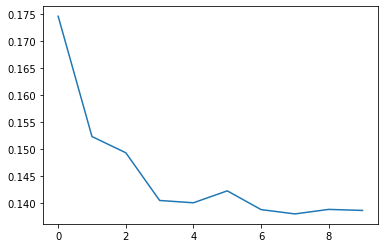

In [6]:
plt.plot(history.history['loss'])

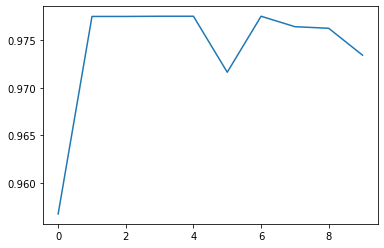

In [7]:
plt.plot(history.history['acc'])

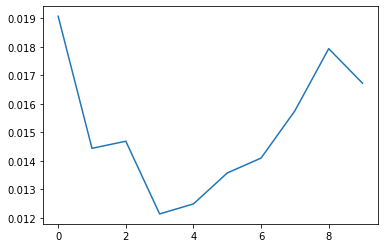

In [8]:
plt.plot(history.history['mse'])

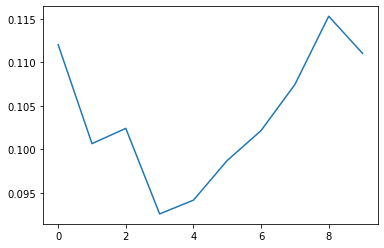

In [9]:
plt.plot(history.history['mae'])